In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df_cotton=pd.read_csv('Cropyield.csv')
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.0,72.0,100.0,62.0,99.0,63.0,NaN,NaN,NaN
1,Alabama,1965,100.0,81.0,100.0,63.0,100.0,66.0,NaN,NaN,NaN
2,Alabama,1966,100.0,83.0,100.0,69.0,100.0,70.0,NaN,NaN,NaN
3,Alabama,1967,100.0,78.0,100.0,71.0,100.0,73.0,NaN,NaN,NaN
4,Alabama,1968,100.0,71.0,99.0,71.0,99.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,4500.0,610.0
752,Texas,2014,NaN,NaN,NaN,NaN,NaN,NaN,5650.0,5200.0,748.0
753,Texas,2015,66.0,65.0,46.0,34.0,16.0,14.0,7000.0,5500.0,809.0
754,Texas,2016,NaN,NaN,NaN,NaN,NaN,NaN,7750.0,4350.0,756.0


In [ ]:
#Data Pre-processing (1)
df_cotton.isna().sum()

State                                   0
Year                                    0
Nitrogen (%)                          288
Nitrogen (Pounds/Acre)                288
Phosphorous (%)                       288
Phosphorous (Pounds/Acre)             288
Potash (%)                            294
Potash (Pounds/Acre)                  298
Area Planted (acres)                  126
Harvested Area (acres)                126
Lint Yield (Pounds/Harvested Acre)    126
dtype: int64

In [ ]:
df_cotton.groupby('State').mean()

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Alabama,1990.5,99.032258,82.806452,92.774194,64.806452,92.903226,74.258065,419.355556,407.822222,644.688889
Arizona,1990.5,93.564103,144.410256,43.205128,60.846154,6.054054,23.411765,289.488889,287.800000,1290.288889
Arkansas,1990.5,97.139535,80.883721,72.697674,41.813953,76.348837,62.069767,733.666667,710.888889,805.911111
California,1990.5,93.975000,131.175000,35.625000,67.750000,10.236842,52.432432,751.577778,744.711111,1299.088889
Georgia,1990.5,98.441176,90.529412,95.117647,58.117647,97.000000,91.558824,865.622222,837.977778,684.311111
Louisiana,1990.5,96.325000,79.600000,62.200000,46.900000,63.875000,57.700000,532.888889,519.866667,751.666667
Mississippi,1990.5,98.953488,101.720930,44.767442,55.372093,54.790698,74.697674,978.155556,961.200000,809.400000
Missouri,1990.5,96.933333,67.300000,86.366667,43.933333,92.433333,64.200000,301.133333,290.955556,769.911111
New Mexico,1990.5,58.190476,68.190476,43.571429,61.857143,8.842105,20.210526,69.533333,60.088889,777.777778


In [ ]:
df_cotton=df_cotton.fillna(df_cotton.groupby('State').transform('mean'))

In [ ]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,Alabama,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,Alabama,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,Alabama,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,Alabama,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,Texas,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,Texas,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,Texas,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [ ]:
df_cotton.isna().sum()

State                                 0
Year                                  0
Nitrogen (%)                          0
Nitrogen (Pounds/Acre)                0
Phosphorous (%)                       0
Phosphorous (Pounds/Acre)             0
Potash (%)                            0
Potash (Pounds/Acre)                  0
Area Planted (acres)                  0
Harvested Area (acres)                0
Lint Yield (Pounds/Harvested Acre)    0
dtype: int64

In [ ]:
df_cotton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               756 non-null    object 
 1   Year                                756 non-null    int64  
 2   Nitrogen (%)                        756 non-null    float64
 3   Nitrogen (Pounds/Acre)              756 non-null    float64
 4   Phosphorous (%)                     756 non-null    float64
 5   Phosphorous (Pounds/Acre)           756 non-null    float64
 6   Potash (%)                          756 non-null    float64
 7   Potash (Pounds/Acre)                756 non-null    float64
 8   Area Planted (acres)                756 non-null    float64
 9   Harvested Area (acres)              756 non-null    float64
 10  Lint Yield (Pounds/Harvested Acre)  756 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usa

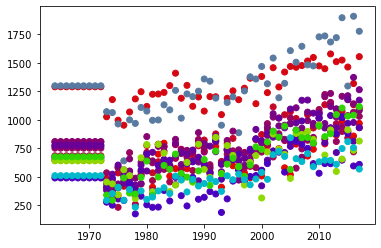

In [ ]:
#Data Visualization
fig, ax = plt.subplots()

colors = {'Alabama':'#E50800',
          'Arizona':'#D50713',
          'Arkansas':'#C60626',
          'California':'#597AA1',
          'Georgia':'#A7044C',
          'Louisiana':'#98045F',
          'Mississippi':'#880372',
          'Missouri':'#790285',
          'New Mexico':'#690198',
          'North Carolina':'#5A00AB',
          'Oklahoma':'#4B00BF',
          'South Carolina':'#8FD900',
          'Tennessee':'#2FD500',
          'Texas':'#00B9CA'
           }

ax.scatter(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'], c=df_cotton['State'].apply(lambda x: colors[x]),)

plt.show()

Text(0.5, 1.0, 'Boxplot of Yield vs State')

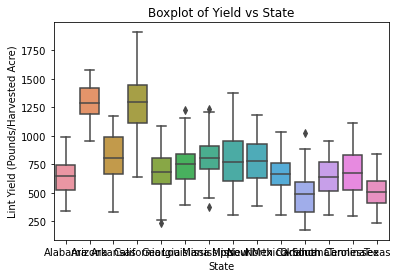

In [ ]:
sns.boxplot(df_cotton['State'],df_cotton['Lint Yield (Pounds/Harvested Acre)'])
plt.title("Boxplot of Yield vs State")

Text(0.5, 1.0, 'Potash (Pounds/Acre)')

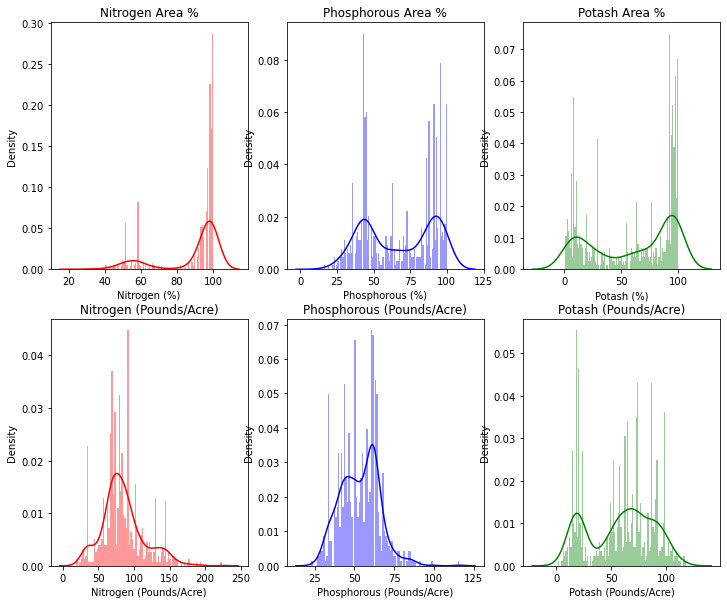

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(231) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (%)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen Area %')

plt.subplot(232) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (%)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous Area %')

plt.subplot(233) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (%)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash Area %')

plt.subplot(234) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (Pounds/Acre)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen (Pounds/Acre)')

plt.subplot(235) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (Pounds/Acre)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous (Pounds/Acre)')

plt.subplot(236) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (Pounds/Acre)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash (Pounds/Acre)')

Text(0.5, 0, 'State Name')

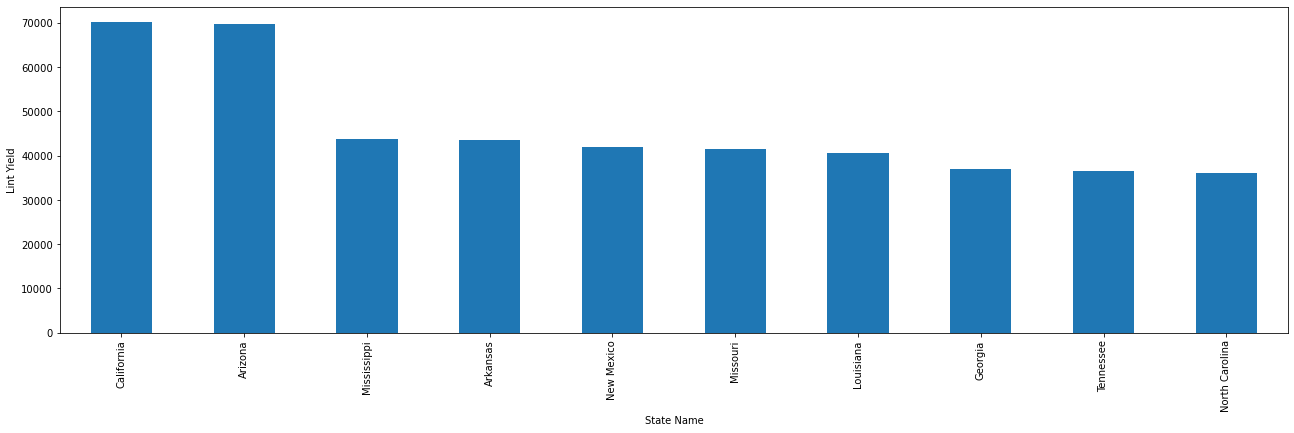

In [ ]:
plt.figure(figsize=(22,6))
GraphData=df_cotton.groupby(['State'])['Lint Yield (Pounds/Harvested Acre)'].sum().nlargest(10)


GraphData.plot(kind='bar')
plt.ylabel('Lint Yield')
plt.xlabel('State Name')

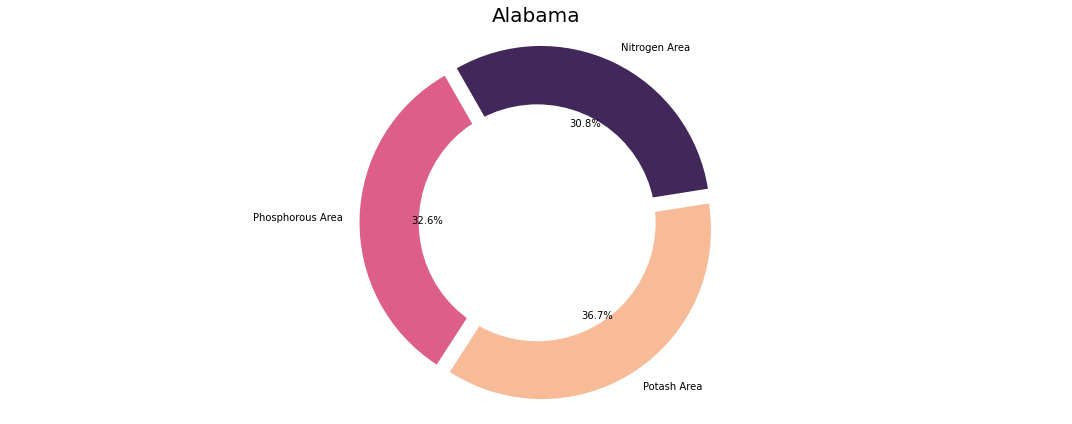

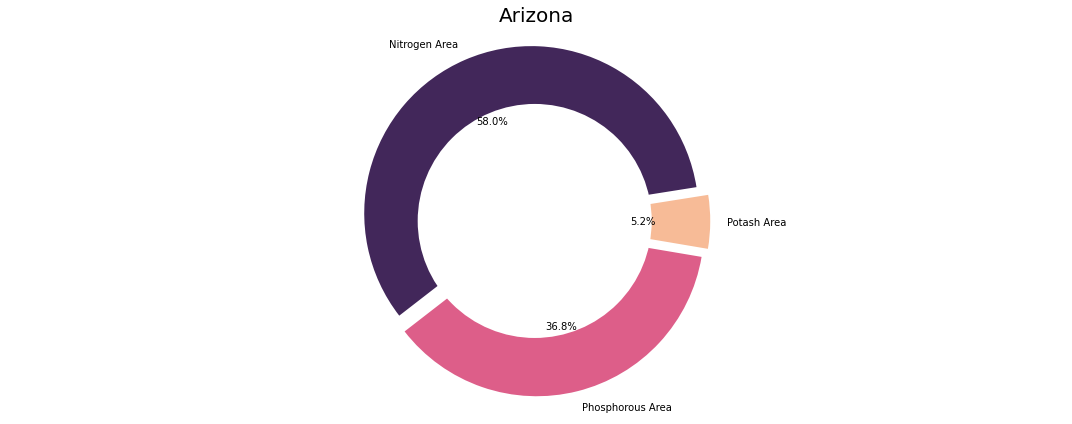

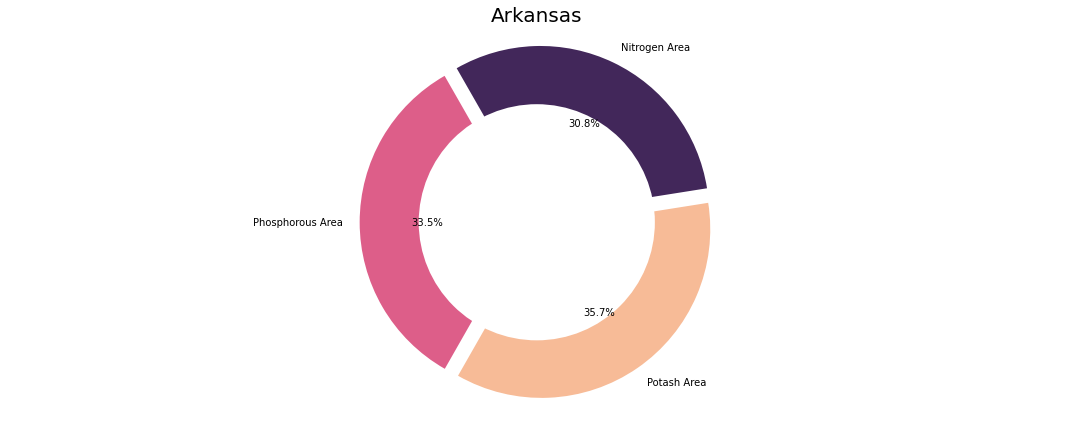

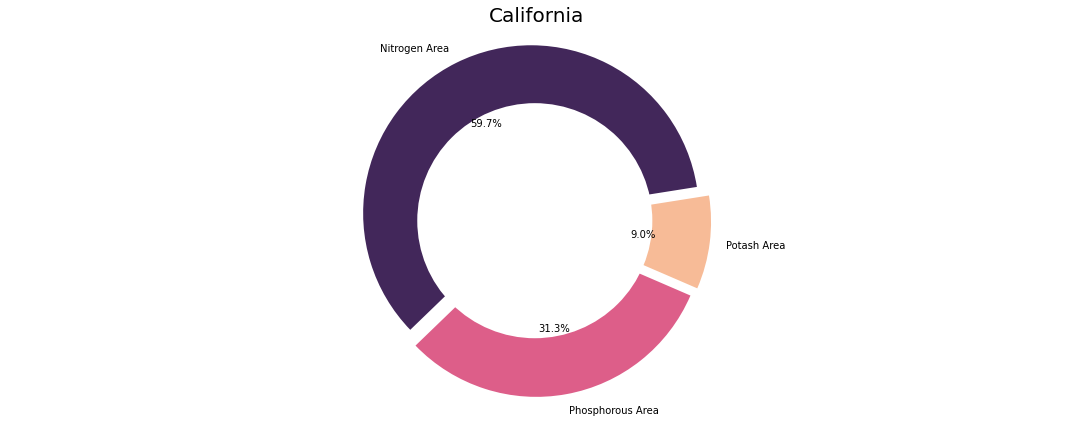

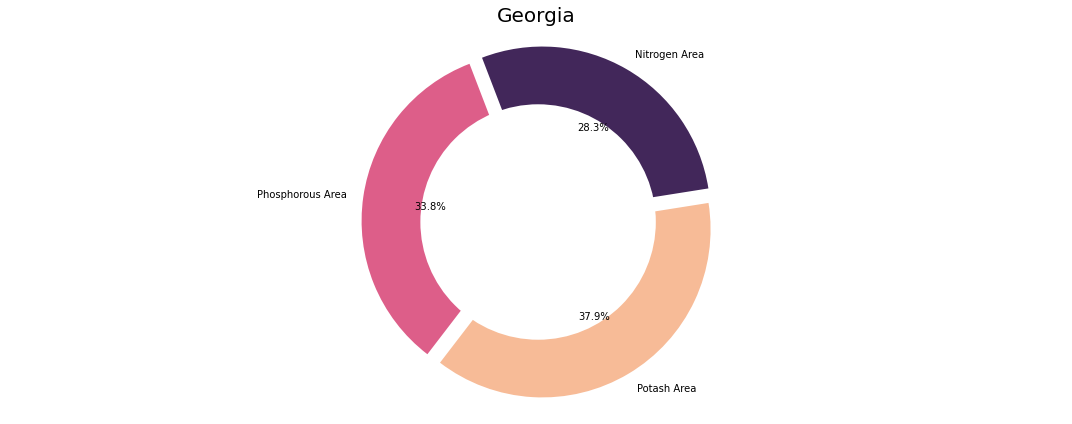

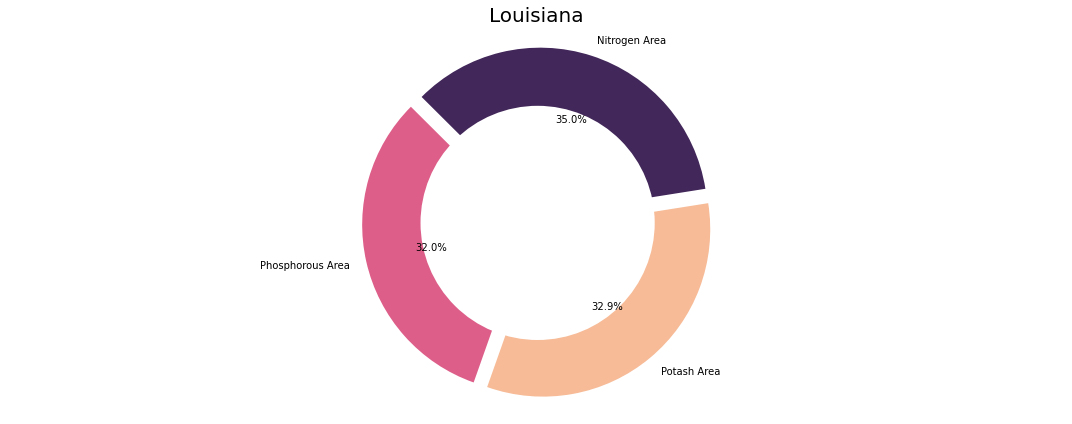

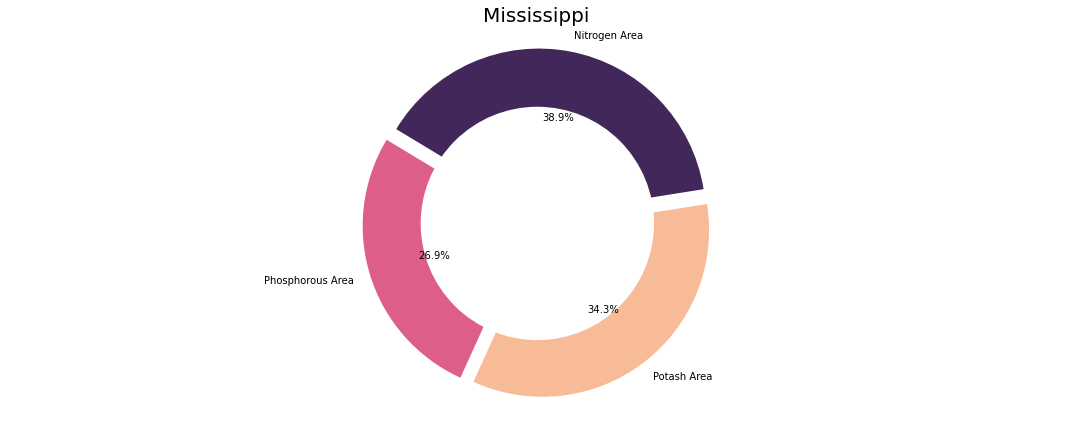

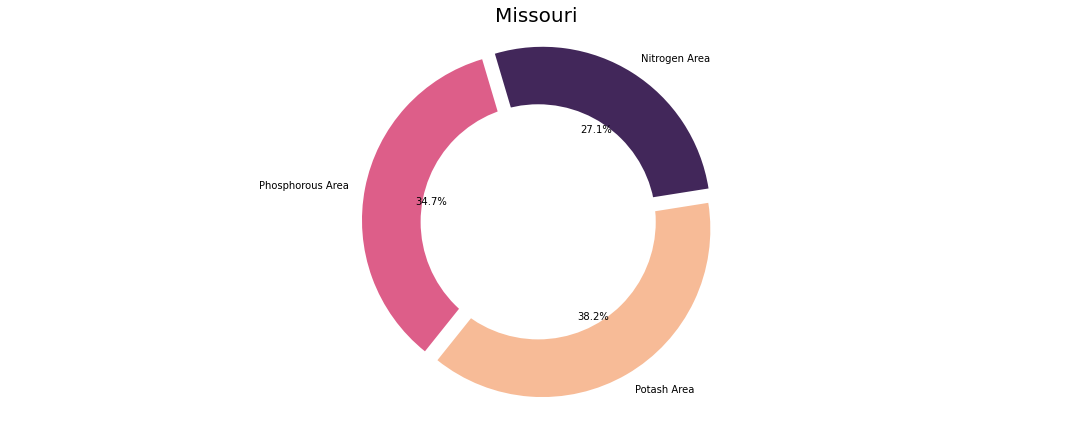

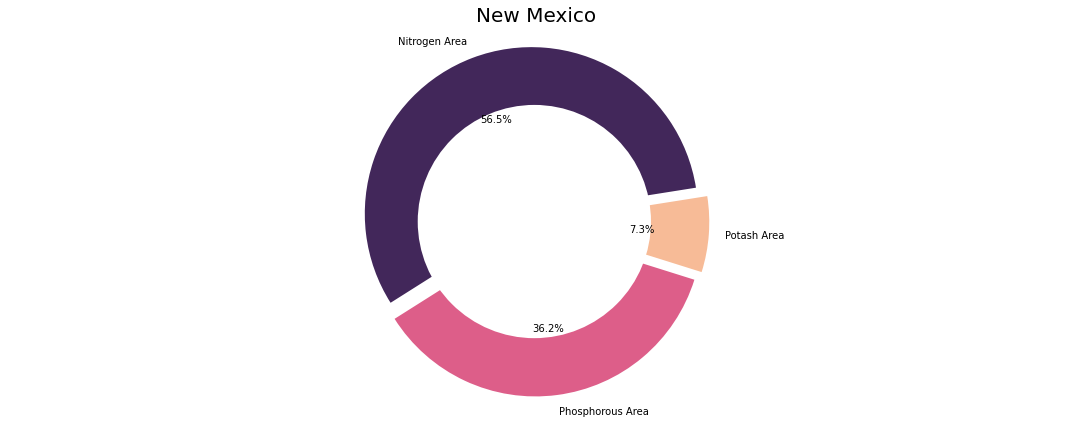

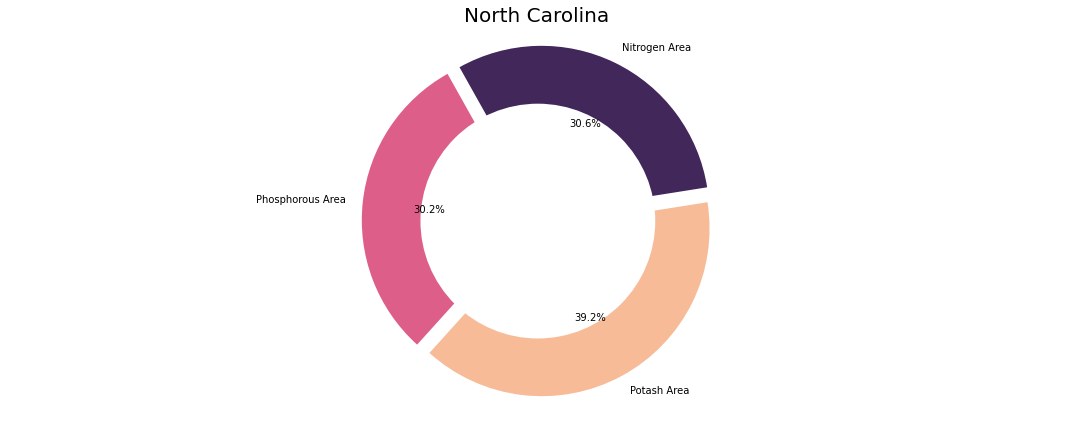

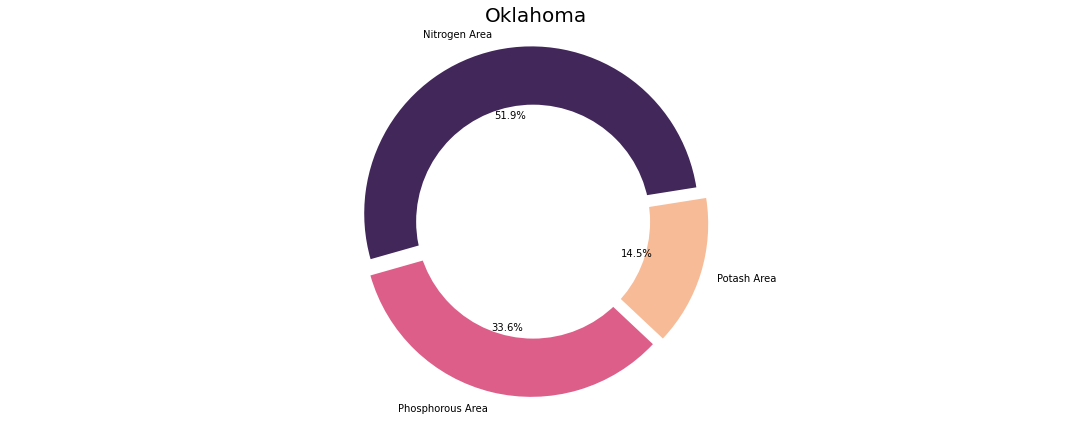

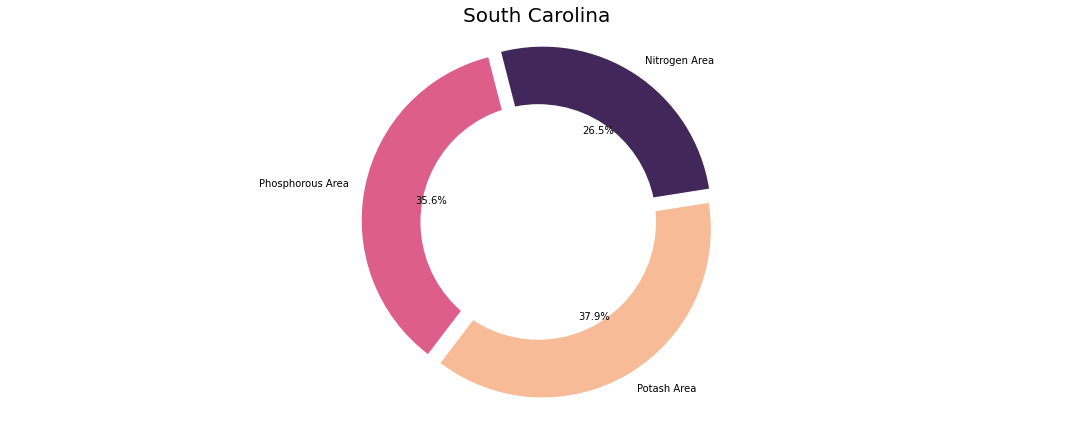

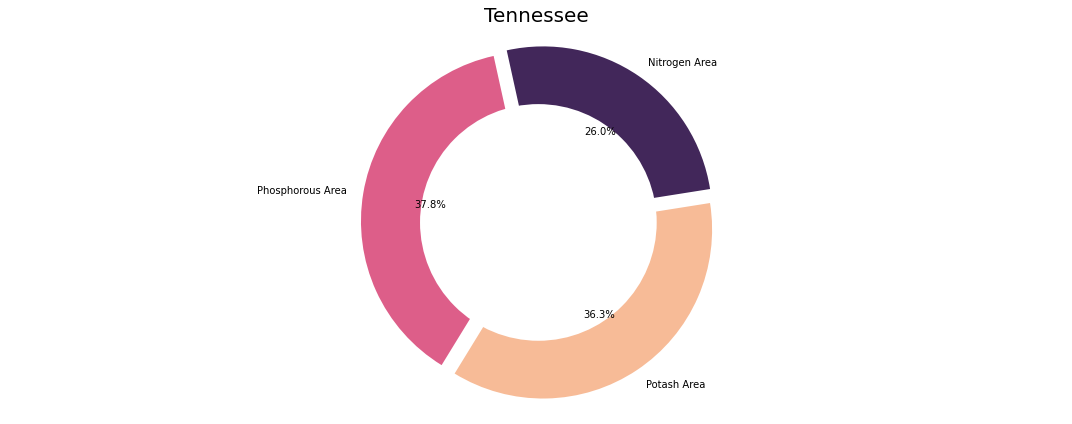

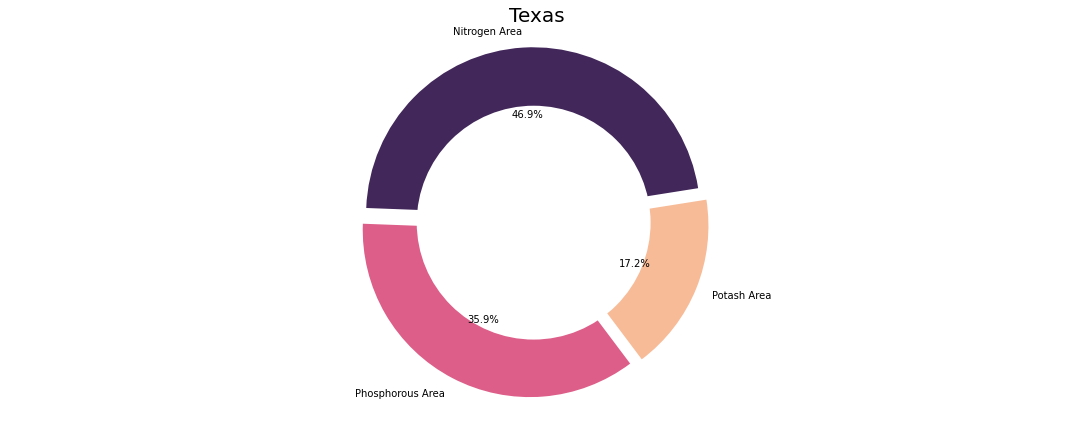

In [ ]:
def plot_pie(nitrogen,phosphorous,potash,title):
    labels = ['Nitrogen Area','Phosphorous Area','Potash Area']
    sizes = [nitrogen,phosphorous,potash]
    color= ['#42275a','#dd5e89','#f7bb97']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title,fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
    
States = df_cotton['State'].unique().tolist()
States

state_df = pd.DataFrame()

for state in States:
    one_state_df = df_cotton.loc[df_cotton['State'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    phosphorous = one_state_df['Phosphorous (%)'].values[-1]
    potash = one_state_df['Potash (%)'].values[-1]
    nitrogen = df_cotton['Nitrogen (%)'].values[-1]
    plot_pie(nitrogen,phosphorous,potash,state)

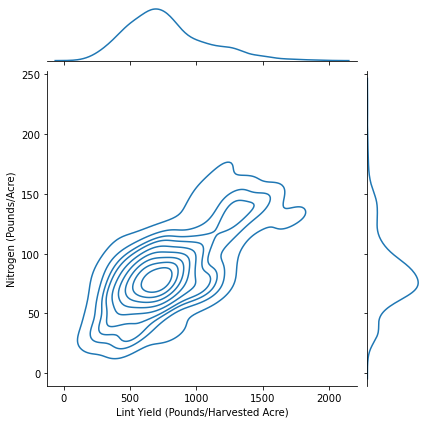

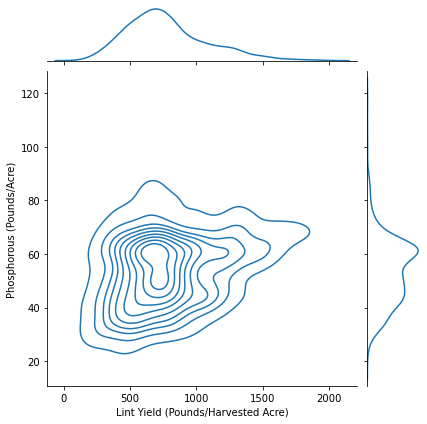

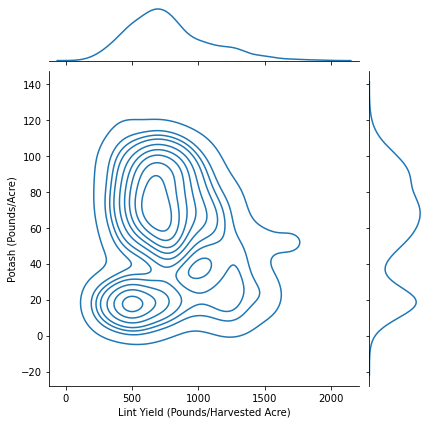

In [ ]:
sns.jointplot(df_cotton['Lint Yield (Pounds/Harvested Acre)'],df_cotton['Nitrogen (Pounds/Acre)'],kind='kde')
sns.jointplot(df_cotton['Lint Yield (Pounds/Harvested Acre)'],df_cotton['Phosphorous (Pounds/Acre)'],kind='kde')
sns.jointplot(df_cotton['Lint Yield (Pounds/Harvested Acre)'],df_cotton['Potash (Pounds/Acre)'],kind='kde')

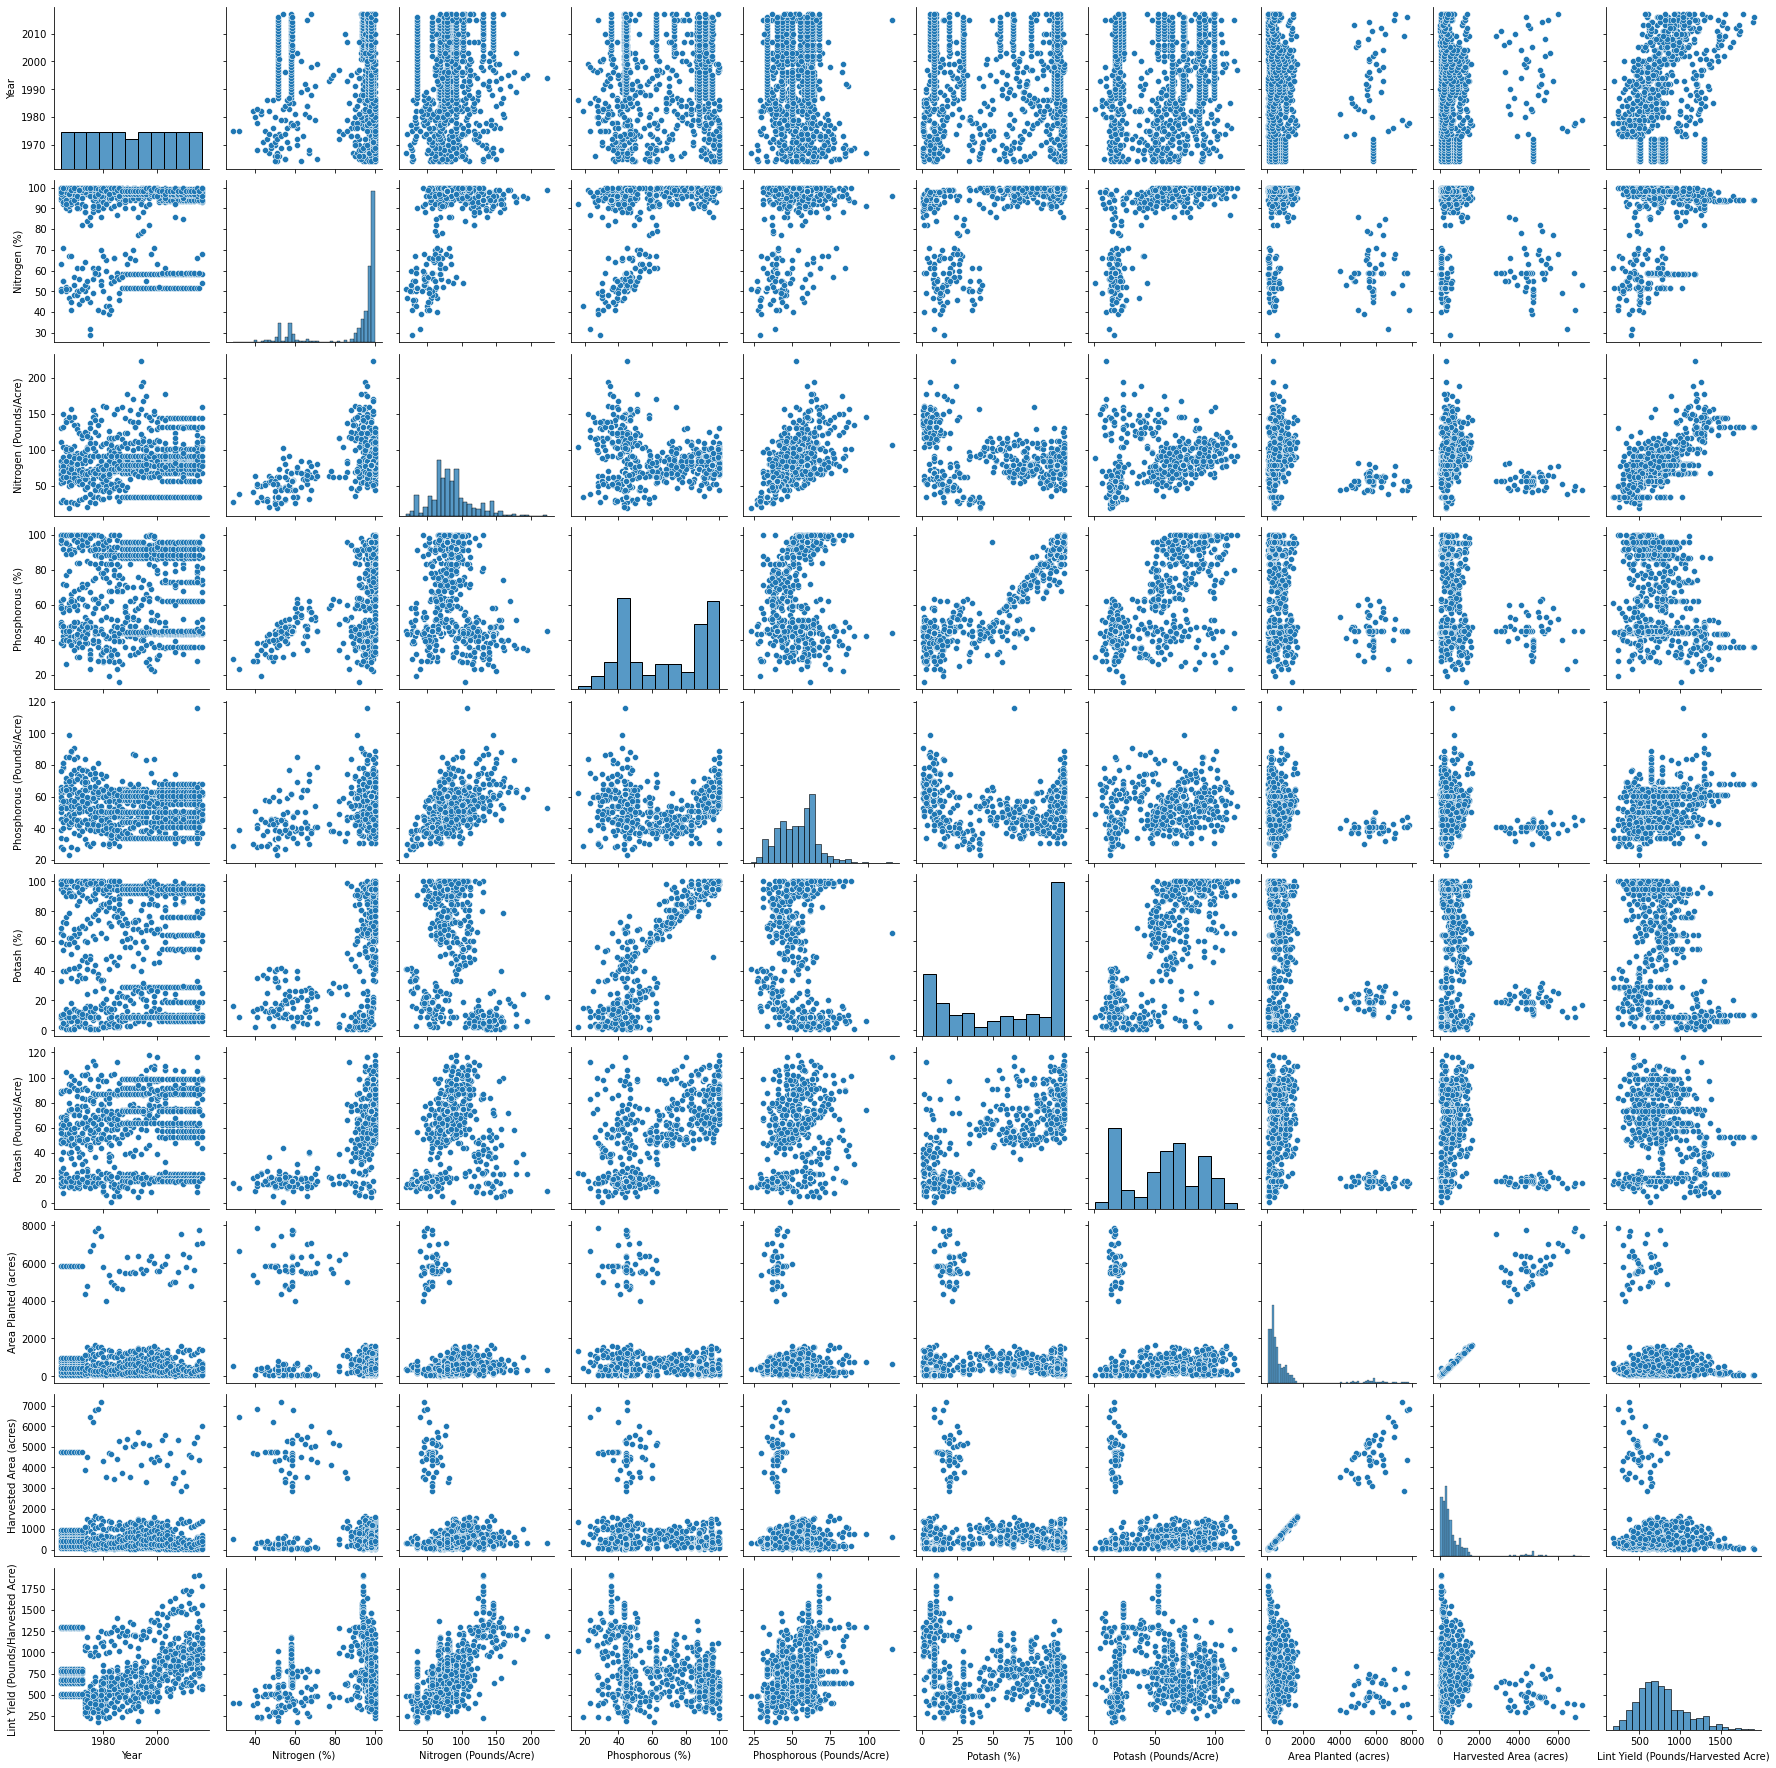

In [ ]:
sns.pairplot(df_cotton)

In [ ]:
#Data Pre-processing (2)
df_cotton['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Georgia',
       'Louisiana', 'Mississippi', 'Missouri', 'New Mexico',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [ ]:
mapping = ({'Alabama':1,
'Arizona':2,
'Arkansas':3,
'California':4,
'Georgia':5,
'Louisiana':6,
'Mississippi':7,
'Missouri':8,
'New Mexico':9,
'North Carolina':10,
'Oklahoma':11,
'South Carolina':12,
'Tennessee':13,
'Texas':14,
           })
df_cotton=df_cotton.replace({'State': mapping})

In [ ]:

df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [ ]:
x=df_cotton.drop('Lint Yield (Pounds/Harvested Acre)',axis=1)
y=df_cotton['Lint Yield (Pounds/Harvested Acre)']

x

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222
...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000


In [ ]:
y

0      644.688889
1      644.688889
2      644.688889
3      644.688889
4      644.688889
          ...    
751    610.000000
752    748.000000
753    809.000000
754    756.000000
755    568.000000
Name: Lint Yield (Pounds/Harvested Acre), Length: 756, dtype: float64

Pearsons correlation: -0.463
Pearsons correlation: 0.389
Pearsons correlation: 0.261
Pearsons correlation: 0.669
Pearsons correlation: -0.319
Pearsons correlation: 0.309
Pearsons correlation: -0.351
Pearsons correlation: -0.084
Pearsons correlation: -0.233
Pearsons correlation: -0.226


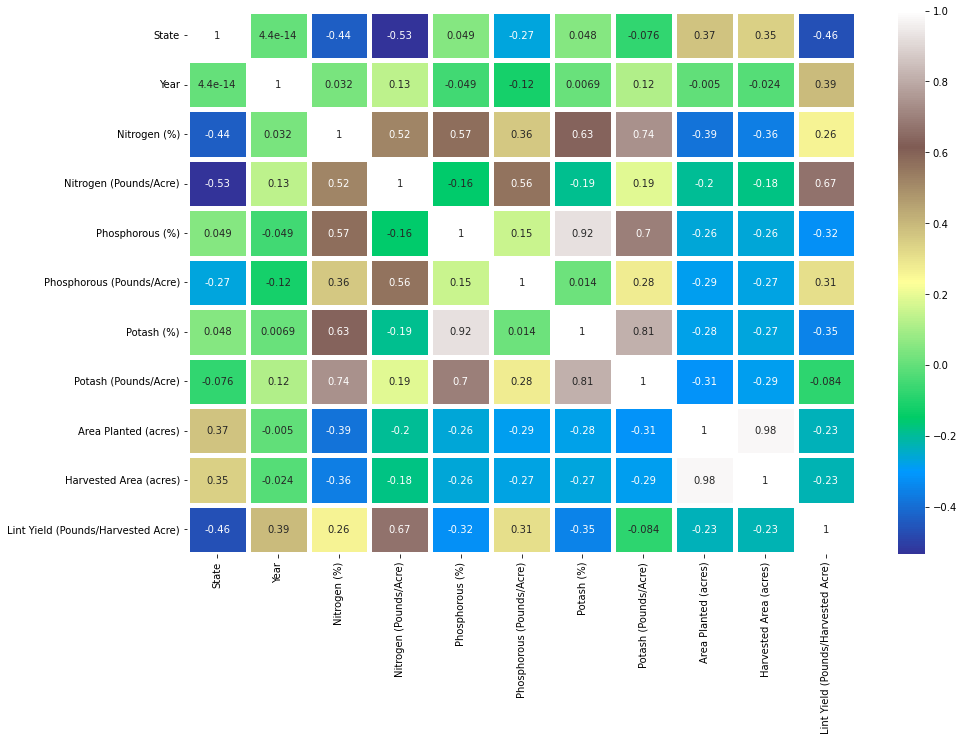

In [ ]:
#Model Implementation - Gradient Regressor with 5 Folds Cross Validation

cor1, _ = pearsonr(df_cotton['State'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Area Planted (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Harvested Area (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

#create a correlation heatmap
sns.heatmap(df_cotton.corr(),annot=True,cmap='terrain',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(15,10)

#negative means less correlation

In [ ]:
#No need to drop any columns since the Pearson Correlations are upwards 0.2 (medium relations)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(604, 10) (152, 10) (604,) (152,)


In [ ]:
from sklearn import ensemble
yield_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')


In [ ]:
yield_predict.fit(x_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=5)

In [ ]:
yield_predict_test=yield_predict.predict(x_test)
yield_predict_train=yield_predict.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':yield_predict_train})

,actual unseen data,predicted unseen data
181,1132.0,1135.437011
76,1190.0,1204.129371
345,829.0,810.045988
627,428.0,443.266602
417,947.0,958.145853
...,...,...
422,1068.0,1046.605122
586,531.0,576.378853
191,953.0,983.295435
461,609.0,634.899134


In [ ]:
scores = cross_val_score(yield_predict, x_test, y_test, cv=5)
scores

array([0.77607798, 0.47740815, 0.6537701 , 0.8080809 , 0.71798095])

In [ ]:
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.7127855895163767

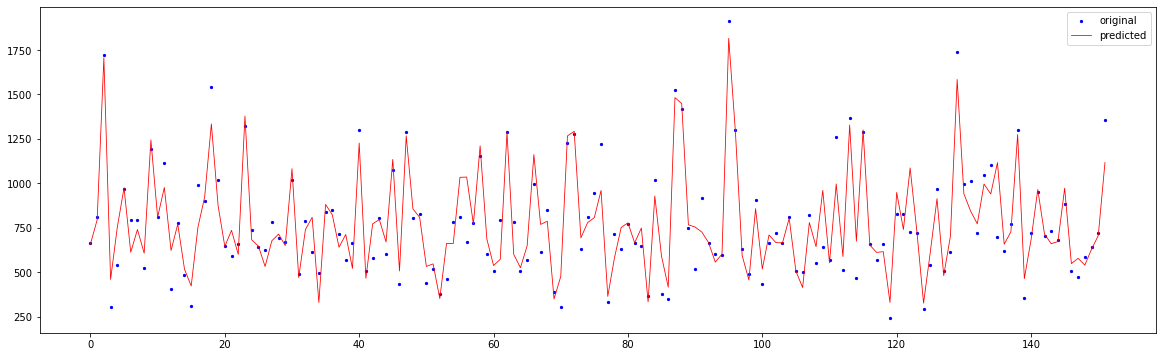

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, yield_predict_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test))
print('R2 value= ',yield_predict.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,yield_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,yield_predict_test)))

MAE=  84.06853276014841
MSE=  13716.496484408915
R2 value=  0.8581485416696042
Adjusted R2 value=  0.856244495249062
RMSE (train)=  39.53025753001103
RMSE (test)=  117.11744739537707


In [ ]:
df_cotton['Lint Yield (Pounds/Harvested Acre)'].max() - df_cotton['Lint Yield (Pounds/Harvested Acre)'].min()

1736.0